# Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Pokemon.csv', index_col=0) 
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


#### Make a bar plot of Type 1

<AxesSubplot:xlabel='Type 1', ylabel='count'>

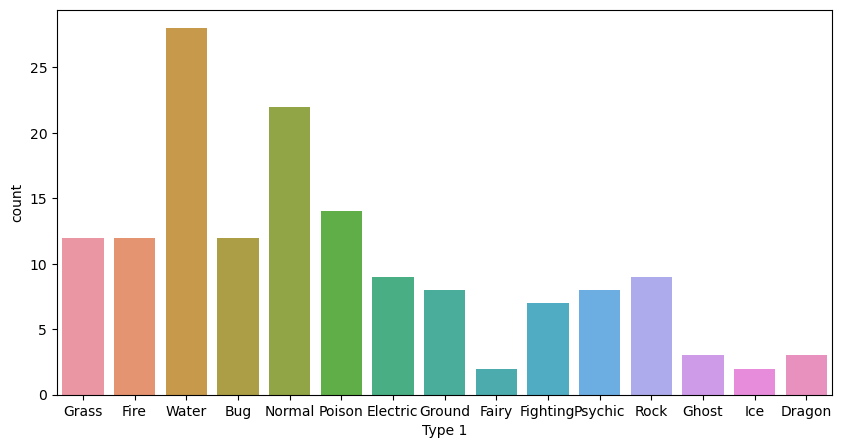

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(x='Type 1', data=df)

#### Change the colours so they match the Type 1. The website [Bulpedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates) gives the correct colour codes.

<AxesSubplot:xlabel='Type 1', ylabel='count'>

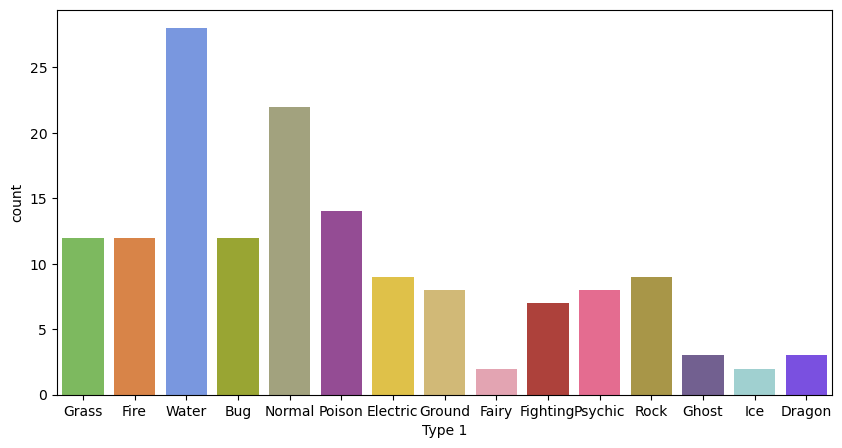

In [4]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
plt.figure(figsize=(10,5))
sns.countplot(x='Type 1', data=df,  palette=pkmn_type_colors) # Set color palette

#### Make histogram (histplot)  for 'Speed' and overlay with density plot (kde = True).

<AxesSubplot:xlabel='Speed', ylabel='Count'>

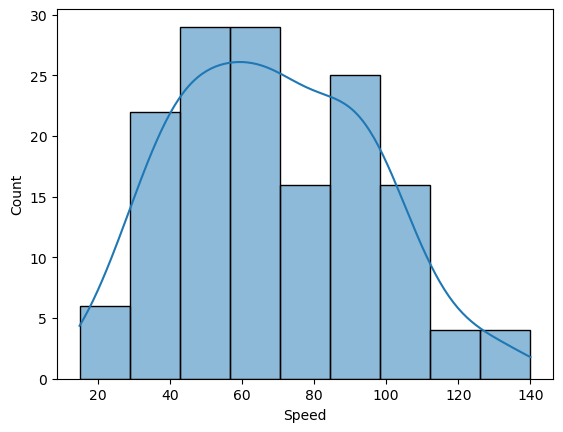

In [5]:
 sns.histplot(x='Speed',data=df, kde = True)


#### Make the variance-covariance matrix for all the numerical variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 18.4+ KB


In [7]:
cor = df.iloc[:,3:11].corr()
cor

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
Total,1.000000,0.576591,0.670939,0.508694,0.680745,0.774383,0.506950,0.504224
HP,0.576591,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939,0.249207
Attack,0.670939,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701,0.361321
Defense,0.508694,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252,0.270861
Sp. Atk,0.680745,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516,0.391712
Sp. Def,0.774383,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656,0.358308
Speed,0.506950,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000,0.240042
Stage,0.504224,0.249207,0.361321,0.270861,0.391712,0.358308,0.240042,1.000000


#### Make a heatmap showing the correlation matrix

<AxesSubplot:>

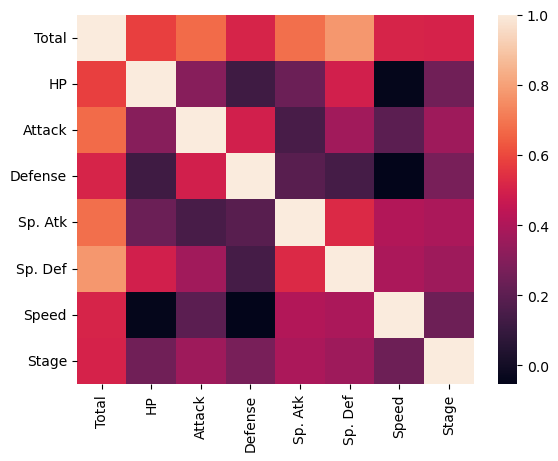

In [8]:
sns.heatmap(cor)

#### Another way of seeing the realtionships between variables is by makeing a pairplot. Make a pairplot for column numbers 3 to 9

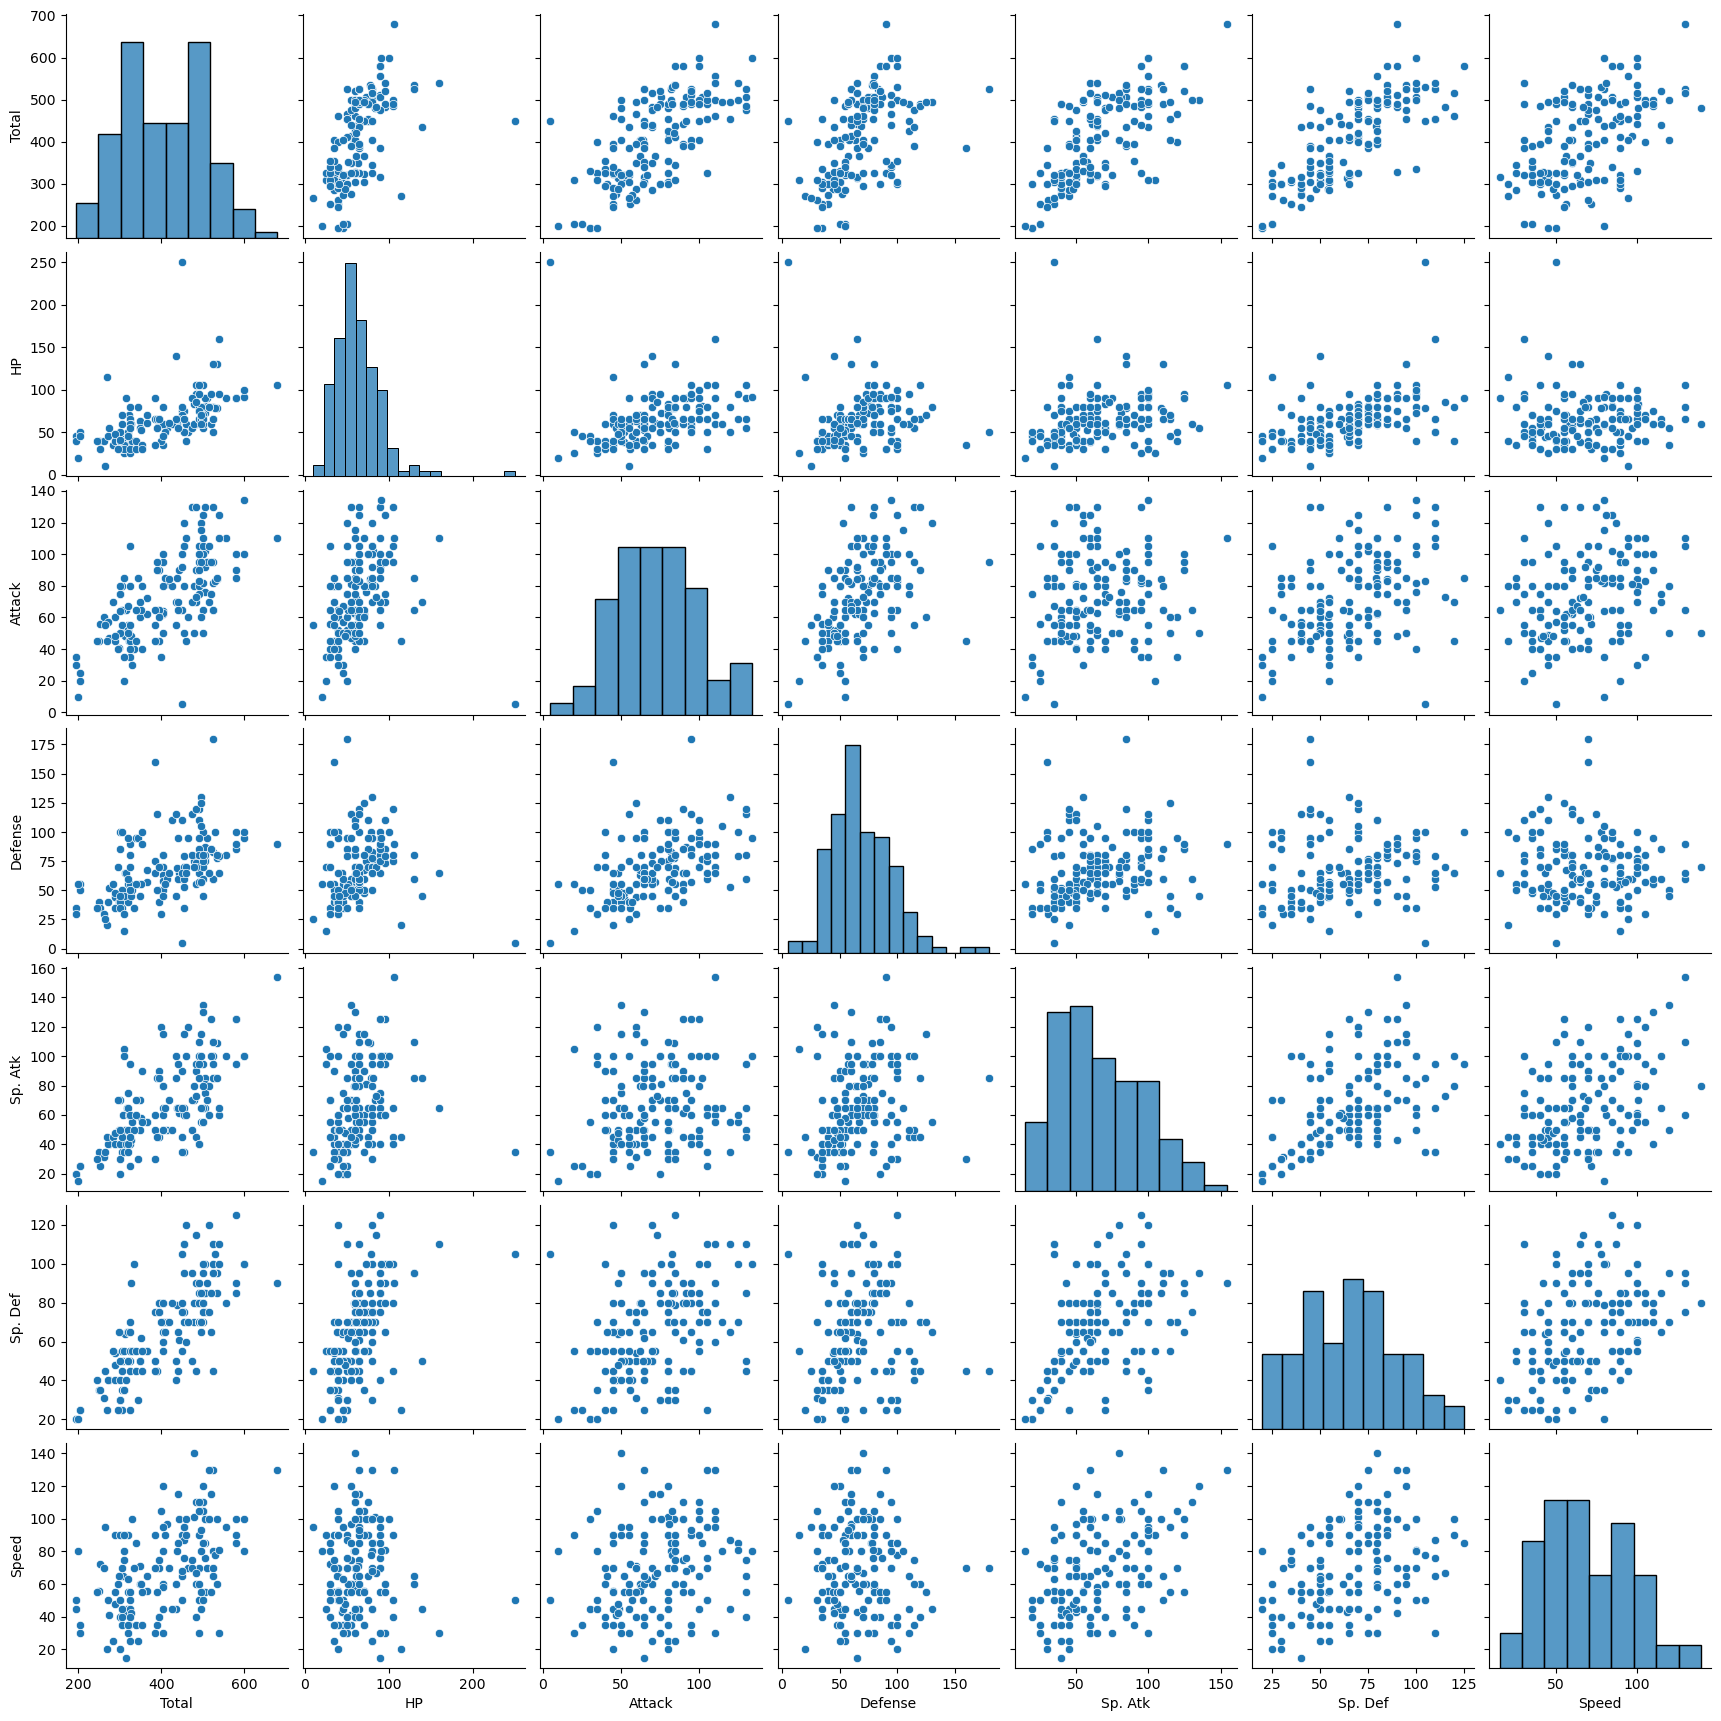

In [9]:
sns.pairplot(data=df.iloc[:,3:10])

#### Make a scatter plot with regression line for HP against Sp. Def

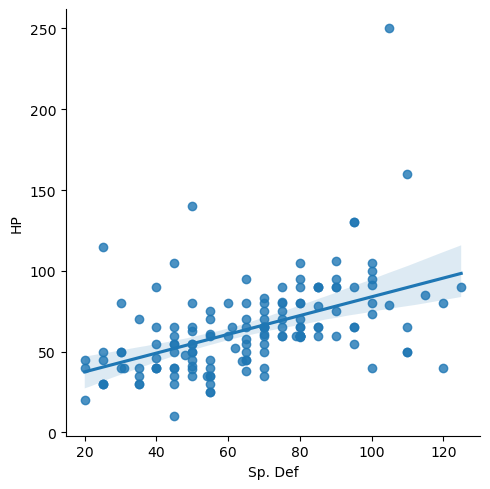

In [10]:
sns.lmplot(x='Sp. Def',y='HP',data=df)

#### Colour by  Stage

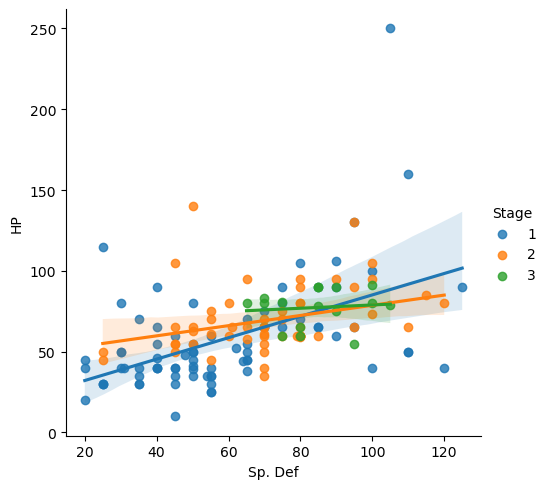

In [11]:
sns.lmplot(x='Sp. Def',y='HP',hue='Stage',data=df)

#### Remove regression lines.

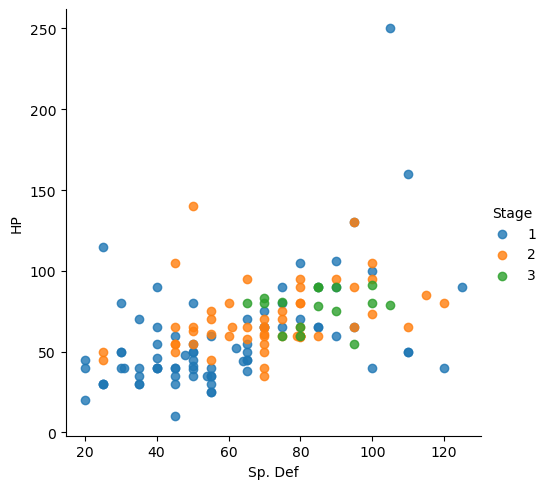

In [12]:
sns.lmplot(x='Sp. Def', y='HP', fit_reg=False, data=df, hue='Stage')  

#### Use plt.xlim() and plt.ylim() to extend axes. Also change the style to 'darkgrid'.

(0.0, 140.0)

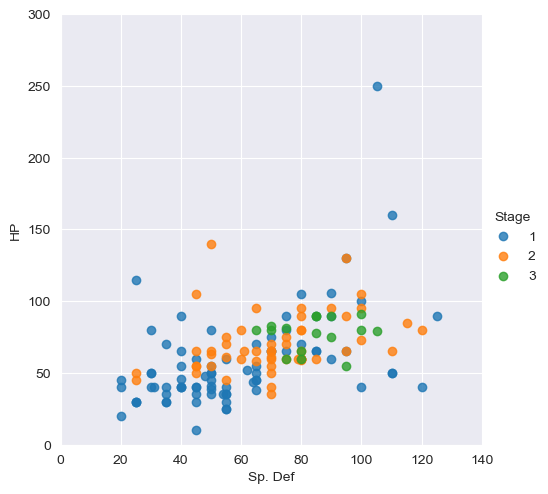

In [19]:
# Set style 
sns.set_style('darkgrid')
# Plot using Seaborn
sns.lmplot(x='Sp. Def', y='HP', data=df, fit_reg=False, hue='Stage')
 
# Extend axes using Matplotlib
plt.ylim(0,300)
plt.xlim(0, 140)

#### Add contour plot (kdeplot) to scatter plot. Don't bother with colours this time.

<AxesSubplot:xlabel='Sp. Def', ylabel='HP'>

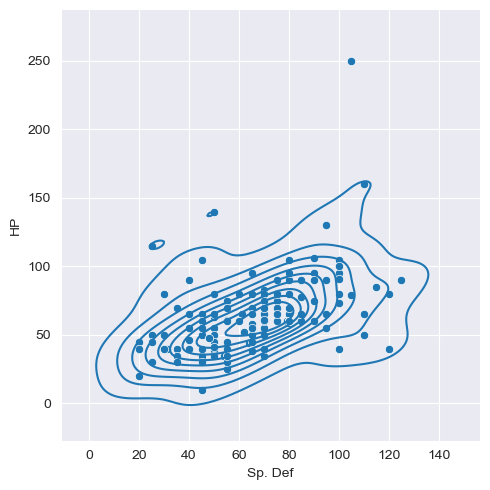

In [14]:
sns.relplot(x='Sp. Def',y='HP',data=df)
sns.kdeplot(x='Sp. Def',y='HP',data=df)

#### Make a jointplot of Sp. Def against HP. 

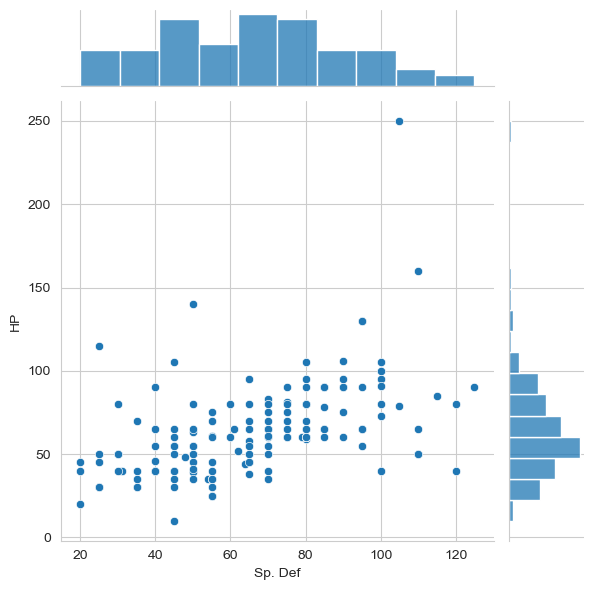

In [15]:
# Set style 
sns.set_style('whitegrid')
# Plot using Seaborn
sns.jointplot(x='Sp. Def', y='HP', data=df)


#### Colour by 'Stage'.

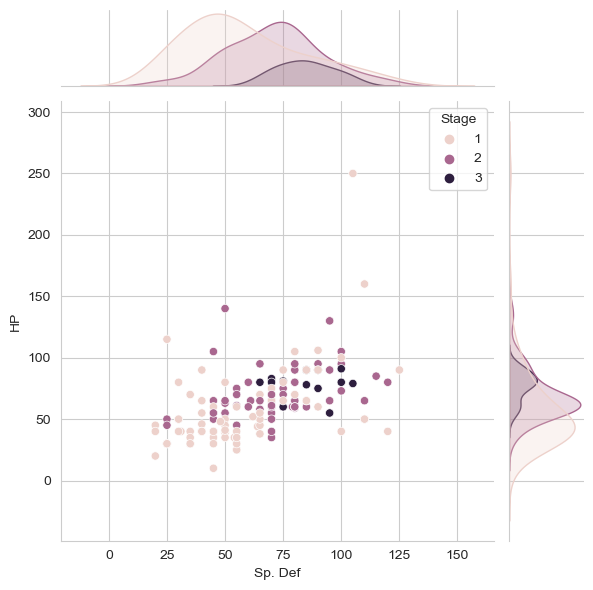

In [16]:
# Set style 
sns.set_style('whitegrid')
# Plot using Seaborn
sns.jointplot(x='Sp. Def', y='HP', data=df, hue= 'Stage')


#### Make boxplots of the variables in columns from HP to Speed.

<AxesSubplot:>

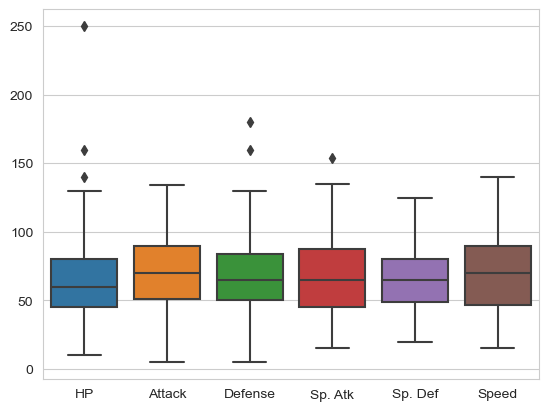

In [17]:
sns.boxplot(data=df.iloc[:,4:10])

#### Make a violin plot for Total against Type 1. Use the colour paletter we defined earlier. Do you need to make the figure bigger?

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

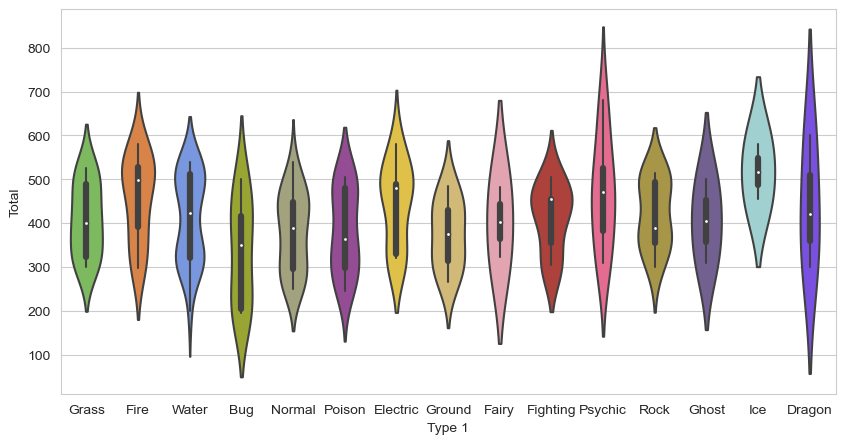

In [18]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Type 1', y='Total',data=df, palette=pkmn_type_colors) 